In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor
import shap

In [9]:
df = pd.read_csv('finish_merg.csv')
for i in df.columns:
    if df[i].dtype is not np.float64:
        df[i] = df[i].astype(np.float64)
print(df.columns)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(X)
print(y)
train_X,test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_X,val_x, train_y, val_y = train_test_split(train_X, train_y, test_size=0.2, random_state=42)

Index(['B4TOD4', 'B5TOB4', 'R45TOB4', 'OMEGA5', 'GAMMAU', 'ALPHA4', 'RE',
       'PT_LOSS'],
      dtype='object')
      B4TOD4  B5TOB4  R45TOB4  OMEGA5  GAMMAU  ALPHA4        RE
0       0.01    1.25      0.9    -5.0    -0.5    10.0  100000.0
1       0.01    1.25      0.9    -5.0    -0.5    10.0  500000.0
2       0.01    1.25      0.9    -5.0    -0.5    20.0  100000.0
3       0.01    1.25      0.9    -5.0    -0.5    20.0  500000.0
4       0.01    1.25      0.9    -5.0    -0.5    30.0  100000.0
...      ...     ...      ...     ...     ...     ...       ...
5225    0.10    1.00      5.0     0.0     0.0    40.0  500000.0
5226    0.10    1.00      5.0     0.0     0.0    50.0  100000.0
5227    0.10    1.00      5.0     0.0     0.0    50.0  500000.0
5228    0.10    1.00      5.0     0.0     0.0    60.0  100000.0
5229    0.10    1.00      5.0     0.0     0.0    60.0  500000.0

[5230 rows x 7 columns]
0       0.108975
1       0.084761
2       0.061027
3       0.047550
4       0.046241
       

Mean Squared Error: 0.0006166467355776716
Mean Absolute Error: 0.010759005160768555
train_x Mean Absolute Erro: 0.009529790144161172


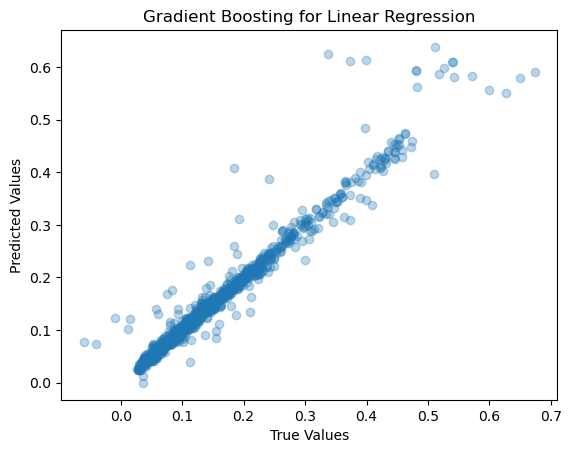

In [11]:
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3)

# Training the model
gbr.fit(train_X, train_y)

# Making predictions
y_pred = gbr.predict(test_X)
pred_train = gbr.predict(train_X)
# Evaluating the model
mse = mean_squared_error(test_y, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mean_absolute_error(test_y, y_pred)}')
print(f'train_x Mean Absolute Erro: {mean_absolute_error(train_y, pred_train)}')
# Plotting the results
plt.scatter(test_y, y_pred, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Gradient Boosting for Linear Regression')
plt.show()

In [ ]:
best_mae = 5
best_model = None
best_param = {'max_depth': None, 'loss' : None, 'learning_rate': None,'n_estimators':None}
learning_rates = [1e-4, 1e-3, 1e-2, 1e-1]
losses = ['squared_error', 'absolute_error', 'huber', 'quantile']
number_trees = [ 1000, 1500, 2000, 2500,3000, 4000,5000,6000,7000]
max_depths = [500,1000,2000,3000,4000,5000]
history_mae = []
for depth1 in max_depths:
    for loss1 in losses:
        for lear1 in learning_rates:
            for num_tree in number_trees:
                gbr = GradientBoostingRegressor(n_estimators=num_tree,loss=loss1, learning_rate=lear1, max_depth=depth1)
                gbr.fit(train_X, train_y)
                pred = gbr.predict(val_x)
                mae = mean_absolute_error(val_y,pred)
                history_mae.append(mae)
                if best_mae > mae:
                    best_model = gbr
                    best_mae = mae
                    best_param['n_estimators'] = num_tree
                    best_param['max_depth'] = depth1
                    best_param['learning_rate'] = lear1
                    best_param['loss'] = loss1

In [ ]:
import matplotlib.pyplot as plt
figure, axis = plt.subplots(1,1)
axis.plot(number_trees,history_mae)
plt.xlabel('Глубина дерева')
plt.ylabel('MAE')
plt.show()
print(mean_absolute_error(test_y,best_model.predict(test_X)))
print(mean_absolute_error(train_y,best_model.predict(train_X)))
print(r2_score(test_y,best_model.predict(test_X)))
print(r2_score(train_y,best_model.predict(train_X)))

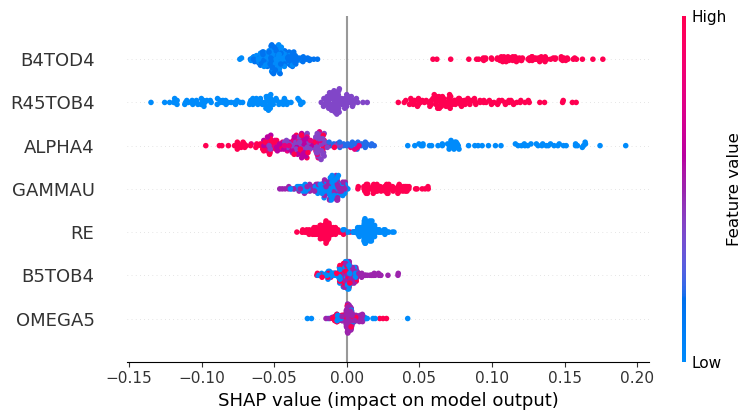

IndexError: index 1 is out of bounds for axis 0 with size 1

In [12]:

explainer = shap.TreeExplainer(gbr)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(test_X)

shap.summary_plot(shap_values, test_X
                  )

# Visualize the SHAP values for the first prediction
shap.initjs()  # Initialize JavaScript visualization in Jupyter notebooks or similar environments
shap.force_plot(explainer.expected_value[1], shap_values[1][0], test_X)